In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [5]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X, y)

In [34]:
# Function to create a mesh to plot in
def plot_my_mesh(svc_m, t):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    plt.subplot(1, 1, 1)
    Z = svc_m.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y**2, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title('SVC with %s kernel'%t)
    plt.show()

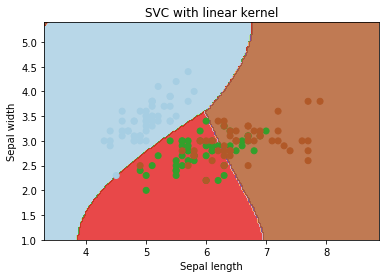

In [35]:
r = 'linear'
plot_my_mesh(svc, r)

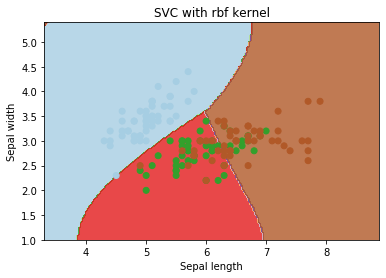

In [37]:
t = 'rbf'
svc = svm.SVC(kernel=t, C=1,gamma='auto').fit(X, y)
plot_my_mesh(svc, t)

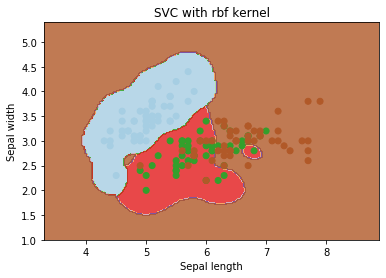

In [38]:
svc = svm.SVC(kernel=t, C=1,gamma=10).fit(X, y)
plot_my_mesh(svc, t)

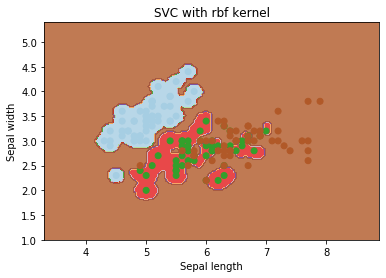

In [39]:
svc = svm.SVC(kernel=t, C=1,gamma=100).fit(X, y)
plot_my_mesh(svc, t)

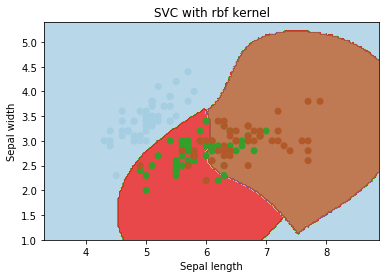

In [40]:
# c = 100
svc = svm.SVC(kernel=t, C=100,gamma='auto').fit(X, y)
plot_my_mesh(svc, t)

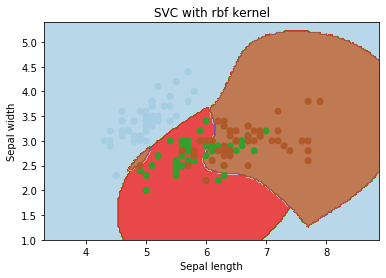

In [41]:
# c = 1000
svc = svm.SVC(kernel=t, C=1000,gamma='auto').fit(X, y)
plot_my_mesh(svc, t)